<a href="https://colab.research.google.com/github/MaxCojocari/ML_Express_Tekwill/blob/main/ML_express_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Upload the dataframe
df = pd.read_csv('/content/drive/MyDrive/ML_Express/wine-quality-white-and-red.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
#Display overall info about your dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
#Find out how many None raws you have in the data
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
#Explore the info about the type of wine
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [7]:
#We have to deal with unbalanced dataset

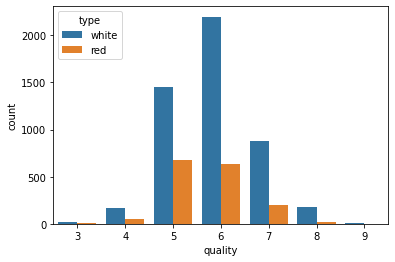

In [8]:
sns.countplot(data=df, x='quality', hue='type')

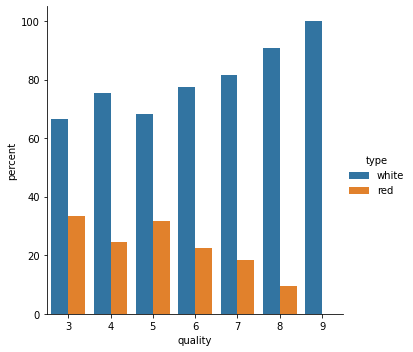

In [9]:
(df
 .groupby('quality')['type']
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot, 'data'), x='quality', y='percent', hue='type', kind='bar'))

Conclusions: 

1) the quality of wine may be a good feature for differentiating white and red wines;
            
2) white wine has the best quality.

(array([  63., 1151., 3248., 1339.,  382.,  177.,   82.,   41.,    7.,
           7.]),
 array([ 3.8 ,  5.01,  6.22,  7.43,  8.64,  9.85, 11.06, 12.27, 13.48,
        14.69, 15.9 ]),
 <a list of 10 Patch objects>)

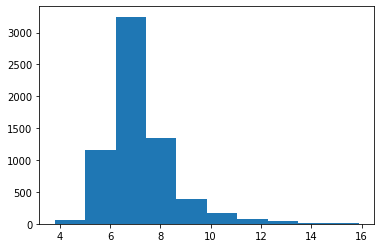

In [10]:
#Exploring the acidity columns -> fixed acidity, volatile acidity
plt.hist(df['fixed acidity'])

(array([1.580e+03, 3.002e+03, 9.960e+02, 6.060e+02, 2.140e+02, 7.000e+01,
        2.300e+01, 3.000e+00, 2.000e+00, 1.000e+00]),
 array([0.08, 0.23, 0.38, 0.53, 0.68, 0.83, 0.98, 1.13, 1.28, 1.43, 1.58]),
 <a list of 10 Patch objects>)

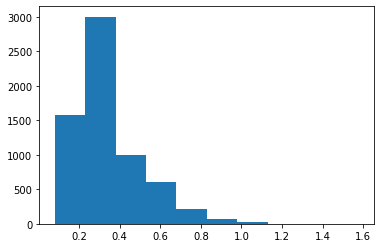

In [11]:
plt.hist(df['volatile acidity'])

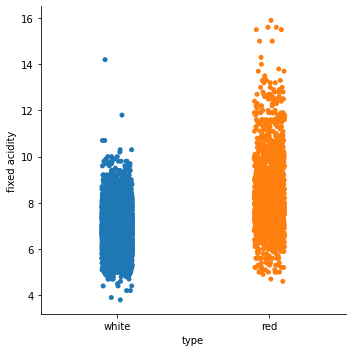

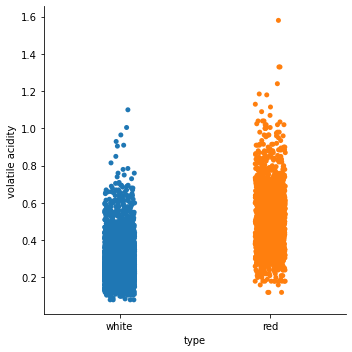

In [12]:
sns.catplot(x='type', y='fixed acidity', hue='type', data=df)
sns.catplot(x='type', y='volatile acidity', hue='type', data=df)

(array([[1.100e+01, 3.100e+01, 1.100e+01, 6.000e+00, 2.000e+00, 0.000e+00,
         2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [3.120e+02, 6.210e+02, 1.350e+02, 6.400e+01, 1.300e+01, 3.000e+00,
         3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [9.200e+02, 1.556e+03, 4.110e+02, 2.400e+02, 8.500e+01, 2.800e+01,
         7.000e+00, 1.000e+00, 0.000e+00, 0.000e+00],
        [2.890e+02, 5.510e+02, 2.250e+02, 1.720e+02, 6.800e+01, 2.300e+01,
         7.000e+00, 1.000e+00, 2.000e+00, 1.000e+00],
        [3.600e+01, 1.370e+02, 9.200e+01, 6.600e+01, 3.900e+01, 1.000e+01,
         1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00],
        [6.000e+00, 6.400e+01, 6.200e+01, 3.200e+01, 5.000e+00, 5.000e+00,
         3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [4.000e+00, 2.700e+01, 3.600e+01, 1.400e+01, 1.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 1.200e+01, 2.000e+01, 8.000e+00, 0.000e+00, 1.000e+00,
         0.000e+00, 0.

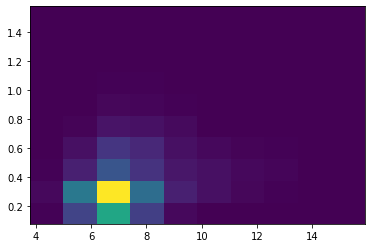

In [13]:
plt.hist2d(df['fixed acidity'], df['volatile acidity'])

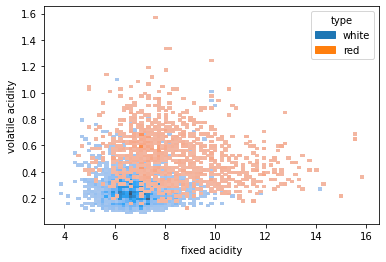

In [14]:
sns.histplot(df, x='fixed acidity', y='volatile acidity', hue='type', kde=True)

Conclusions: 

1) fixed acidity and volatile acidity can be used for type prediction as well;

2) red wine is highly acidic than white one, so columns `fixed acidity` and `volatile acidity` (together) have the highest corelation with `type`.

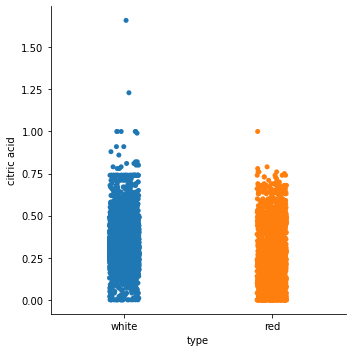

In [15]:
#citric acid
sns.catplot(x='type', y='citric acid', hue='type', data=df)

Conclusion: 

The quantity of citric acid does not give us to much info, so the corresponding column can be droped.

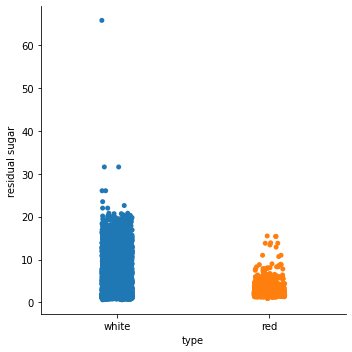

In [16]:
#residual sugar
sns.catplot(x='type', y='residual sugar', hue='type', data=df)

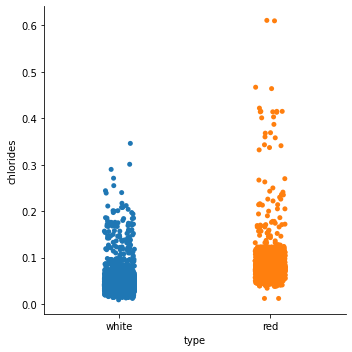

In [17]:
#chlorides
sns.catplot(x='type', y='chlorides', hue='type', data=df)

Conclusion:

Columns with residual sugar and chlorides give us sufficient info for type prediction.

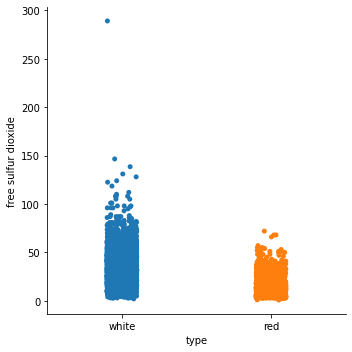

In [18]:
#free sulfur dioxide
sns.catplot(x='type', y='free sulfur dioxide', hue='type', data=df)

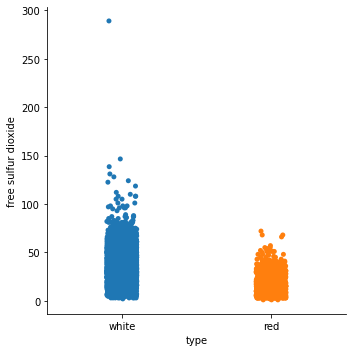

In [19]:
#total sulfur dioxide
sns.catplot(x='type', y='free sulfur dioxide', hue='type', data=df)

In [20]:
# Average content of free sulfur dioxide
df['%free_sulf_dioxide'] = df['free sulfur dioxide'] / df['total sulfur dioxide'] * 100

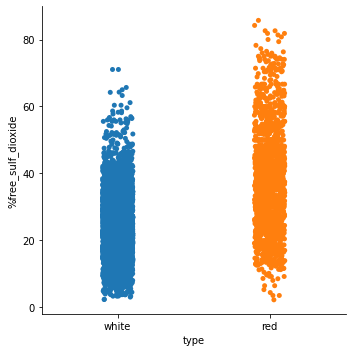

In [21]:
sns.catplot(x="type", y="%free_sulf_dioxide", hue="type", data=df)

Conlusion:

New column `%free_sulfur_dioxide` has a great absolute correlation with `type`, because red wines has a high percentage of free sulfur dioxide. This is due to high acidity of red wines, disulphite anions are unstable in very acidic conditions, and therefore, a lot of free $SO_2$ is released outside.

Hence, column `total sulfur dioxide` can be droped as well.

In [49]:
df['log_density'] = np.absolute(np.log10(np.absolute(1-df['density'])))
df['log_density']

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


0       3.000000
1       2.221849
2       2.309804
3       2.356547
4       2.356547
          ...   
6492    2.292430
6493    2.311580
6494    2.370590
6495    2.343902
6496    2.345823
Name: log_density, Length: 6497, dtype: float64

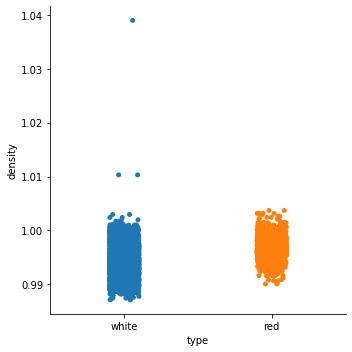

In [51]:
#density
sns.catplot(x='type', y='density', hue='type', data=df)

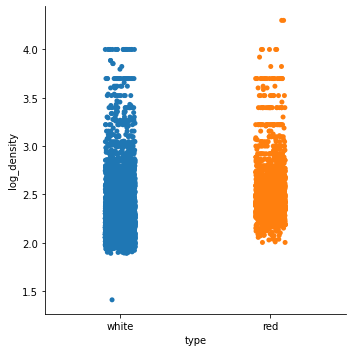

In [50]:
#log_density
sns.catplot(x='type', y='log_density', hue='type', data=df)

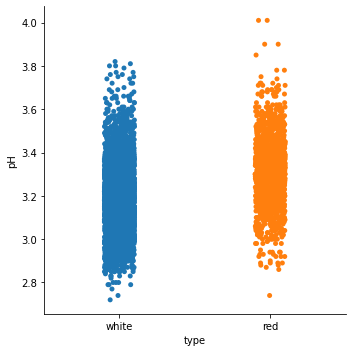

In [31]:
#pH
sns.catplot(x='type', y='pH', hue='type', data=df)

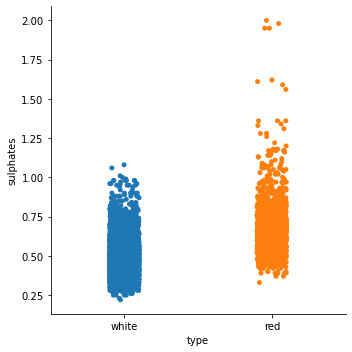

In [30]:
#sulphates
sns.catplot(x='type', y='sulphates', hue='type', data=df)

Column `sulphates` also has a slightly strong correlation with `type`.

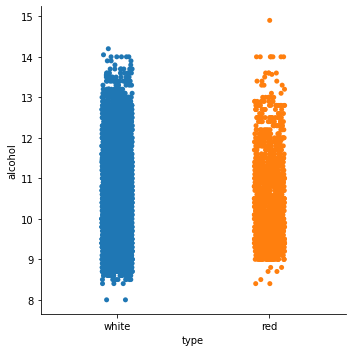

In [24]:
#alcohol
sns.catplot(x='type', y='alcohol', hue='type', data=df)